<a href="https://colab.research.google.com/github/diegoednaldo/LH_CD_DIEGOSANTANA/blob/main/notebook_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória dos Dados (EDA)
Primeiro, vamos importar as bibliotecas necessárias e carregar os dados.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import Image

In [2]:
# Carregar o dataset
df = pd.read_csv('desafio_indicium_imdb.csv', index_col=0)

# Mostrar as primeiras linhas do dataset
df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


### Análise de Valores Faltantes
Verificar se há valores faltantes no dataset.

In [3]:
# Mostrar informações básicas do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 1 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    object 
 2   Certificate    898 non-null    object 
 3   Runtime        999 non-null    object 
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     842 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          830 non-null    object 
dtypes: float64(2), int64(1), object(12)
memory usage: 124.9+ KB


### Conversão de variáveis e tratamento da base de dados
Abaixo são feitos alguns tratamentos, como a remoção de linhas duplicadas e a conversão de colunas com valores numéricos importantes que inicialmente na base de dados estavam classificadas como categóricas.

In [4]:
# Remover linhas duplicadas
df = df.drop_duplicates()

In [5]:
# Converter colunas para o tipo numérico quando apropriado
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')
df['Meta_score'] = pd.to_numeric(df['Meta_score'], errors='coerce')
df['IMDB_Rating'] = pd.to_numeric(df['IMDB_Rating'], errors='coerce')
df['No_of_Votes'] = pd.to_numeric(df['No_of_Votes'], errors='coerce')

# Função para converter Runtime apenas em minutos
def convert_runtime(runtime_str):
    # Remove ' min' e converte para int
    minutes = int(runtime_str.replace(' min', ''))
    return minutes  # Retorna apenas o número de minutos como inteiro

# Aplica a função de conversão à coluna Runtime
df['Runtime'] = df['Runtime'].apply(convert_runtime)

# Remover caracteres não numéricos da coluna 'Gross' e converter para float essa coluna de faturamento
df['Gross'] = df['Gross'].replace('[\$,]', '', regex=True).astype(float)

<>:17: SyntaxWarning: invalid escape sequence '\$'
<>:17: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-3466311149.py:17: SyntaxWarning: invalid escape sequence '\$'
  df['Gross'] = df['Gross'].replace('[\$,]', '', regex=True).astype(float)


**Após isso, é iniciado o tratamento dos valores nulos da base de dados.**

Inicialmente é feito a proporção de valores nulos em cada coluna.

In [6]:
# Calcular a proporção de valores nulos em cada coluna
null_proportion = df.isnull().mean() * 100

# Exibir a proporção de valores nulos
print(null_proportion)

Series_Title      0.000000
Released_Year     0.100100
Certificate      10.110110
Runtime           0.000000
Genre             0.000000
IMDB_Rating       0.000000
Overview          0.000000
Meta_score       15.715716
Director          0.000000
Star1             0.000000
Star2             0.000000
Star3             0.000000
Star4             0.000000
No_of_Votes       0.000000
Gross            16.916917
dtype: float64


Inicialmente é feito a exclusão da única linha nula da coluna 'Released_Year', como podemos ver na proporção de valores nulos acima, a exclusão dessa única linha não trará perca de informação da base de dados em todo o processo exploratório e preditivo que farei.

In [7]:
# Excluir linhas nulas na coluna Released Year, que no caso só possui uma linha nula
df = df.dropna(subset=['Released_Year'])

Logo, para colunas, como a de faturamento 'Gross' e a de 'Meta_score', a decisão sobre excluir valores nulos de um DataFrame depende de vários fatores, incluindo a proporção de valores ausentes, o impacto potencial dessa exclusão na análise e a natureza dos dados.

Mas tem umas orientações mais gerais que a comunidade no geral segue, sendo elas:

Baixa Proporção de Valores Nulos: Se menos de 5% dos dados estão ausentes, geralmente é seguro excluir esses valores sem afetar significativamente a análise.

Proporção Moderada de Valores Nulos (5-20%): Nessa faixa, a decisão depende do contexto e da importância das variáveis com valores ausentes. Substituir valores nulos por uma estatística (média, mediana, moda) ou usando técnicas de imputação pode ser mais adequado.

Alta Proporção de Valores Nulos (>20%): Se mais de 20% dos dados estão ausentes, excluir esses valores pode resultar na perda de informações importantes. Nesse caso, técnicas de imputação ou modelagem para lidar com valores ausentes são recomendadas.

A coluna **'Meta_score'** por exemplo, possui uma proporção de mais de 15% de valores nulos. Logo, excluir todas as linhas nulas dessa coluna pode causar uma grande perca de informação dos dados. Então, nesse caso, substituir valores nulos por uma estatística (média, mediana, moda) pode ser mais adequado.

Então, para tentar compreender qual substituição é mais devida para essa coluna, utilizaremos visualizações analíticas para auxiliar nessa escolha.

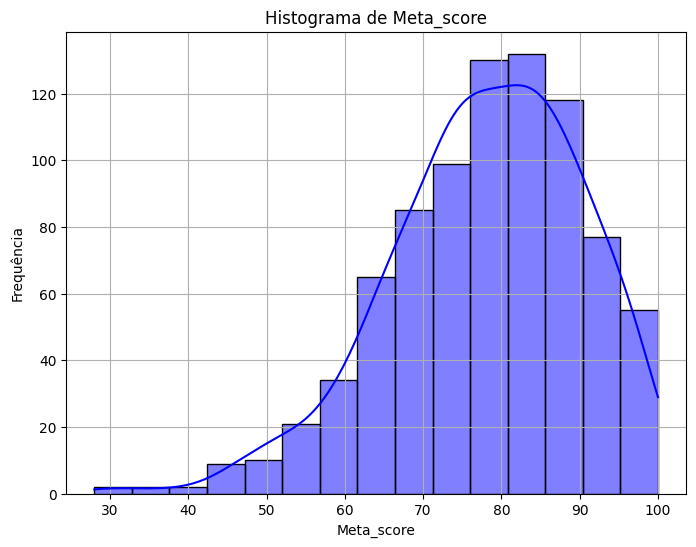

In [8]:
# Plotar o histograma de Meta_score
plt.figure(figsize=(8, 6))
sns.histplot(df['Meta_score'].dropna(), bins=15, kde=True, color='blue', edgecolor='black')
plt.title('Histograma de Meta_score')
plt.xlabel('Meta_score')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

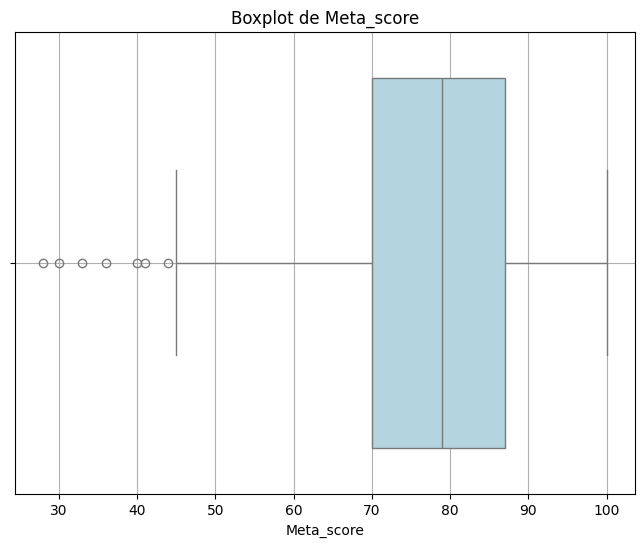

In [9]:
# Plotar o boxplot de Meta_score
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Meta_score'], color='lightblue')
plt.title('Boxplot de Meta_score')
plt.xlabel('Meta_score')
plt.grid(True)
plt.show()

A análise do histograma revela que a coluna **'Meta_score'** exibe uma distribuição normalizada de seus valores. Portanto, optaremos por utilizar a **média** para substituição de dados faltantes, como observado. Além disso, conforme indicado pelo boxplot, a média e a mediana são aproximadamente iguais, reforçando que a média é uma estimativa confiável para valores ausentes.

In [11]:
# Calcular a média da coluna Meta_score
mean_meta = df['Meta_score'].mean()

# Imputar valores nulos com a média
df['Meta_score'] = df['Meta_score'].fillna(mean_meta)

# Verificar se os valores nulos foram preenchidos
null_count = df['Meta_score'].isnull().sum()
print(f"Valores nulos restantes em Meta_score: {null_count}")

Valores nulos restantes em Meta_score: 0


Já a coluna **'Gross'**, possui uma proporção de mais de 16% de valores nulos. Como falado anteriormente, excluir todas as linhas nulas pode causar uma grande perca de informação dos dados, podendo impossibilitar no processo exploratório e preditivo, entendimentos importantes sobre os dados.

Sendo assim, para dá continuidade à análise exploratória, os valores nulos da coluna **Gross** que representa valores financeiros e pode ter uma distribuição assimétrica com muitos outliers (alguns filmes têm faturamentos extremamente altos em comparação com a maioria), serão substituídos pela **mediana**, que é normalmente a **melhor** escolha para esses valores financeiros.

In [13]:
# Calcular a mediana da coluna 'Gross'
median_gross = df['Gross'].median()

# Imputar valores nulos com a mediana
df['Gross'] = df['Gross'].fillna(median_gross)

# Verificar se os valores nulos foram preenchidos
null_count = df['Gross'].isnull().sum()
print(f"Valores nulos restantes em Gross: {null_count}")

Valores nulos restantes em Gross: 0
